In [1]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = "/content/archive (2).zip"

# Extract files to the current directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        # Avoid creating subdirectories by extracting files directly
        if not os.path.basename(file):  # Skip directories
            continue
        with open(os.path.basename(file), "wb") as output_file:
            output_file.write(zip_ref.read(file))

print("Files extracted without creating directories.")

Files extracted without creating directories.


# Data handling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
dataset = pd.read_csv('/content/Student_Performance.csv')
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
dataset.shape

(10000, 6)

In [6]:
dataset.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [7]:
dataset.info

<bound method DataFrame.info of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced  Performance Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[10000 rows x 6 columns]>

In [9]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [10]:
dataset.isna()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [13]:
dataset.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [22]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [23]:
y

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [24]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [25]:
X = dataset.values

# Corrected ColumnTransformer: encode column index 2 (Extracurricular Activities)
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [2])],  # Encoding the 3rd column (index 2)
    remainder='passthrough'  # Keep the remaining columns as-is
)

# Apply the transformation
X = np.array(ct.fit_transform(X))

# Display the transformed matrix
print(X)

[[0.0 1.0 7 ... 9 1 91.0]
 [1.0 0.0 4 ... 4 2 65.0]
 [0.0 1.0 8 ... 7 2 45.0]
 ...
 [0.0 1.0 6 ... 8 5 74.0]
 [0.0 1.0 9 ... 7 0 95.0]
 [1.0 0.0 7 ... 8 1 64.0]]


In [19]:
X

array([[0.0, 0.0, 0.0, ..., 99, 'Yes', 1],
       [1.0, 0.0, 0.0, ..., 82, 'No', 2],
       [0.0, 0.0, 0.0, ..., 51, 'Yes', 2],
       ...,
       [0.0, 0.0, 0.0, ..., 83, 'Yes', 5],
       [0.0, 0.0, 0.0, ..., 97, 'Yes', 0],
       [0.0, 0.0, 0.0, ..., 74, 'No', 1]], dtype=object)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train.shape

(8000, 7)

# MULTIREGRESSOR

In [27]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = multi_regressor.predict(X_test)

In [29]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[ 1.66592334e-16 -5.55111512e-16  2.15105711e-16 -1.38777878e-16
 -8.98586761e-16  1.38777878e-17  1.00000000e+00]
-3.552713678800501e-14


In [31]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 1.0


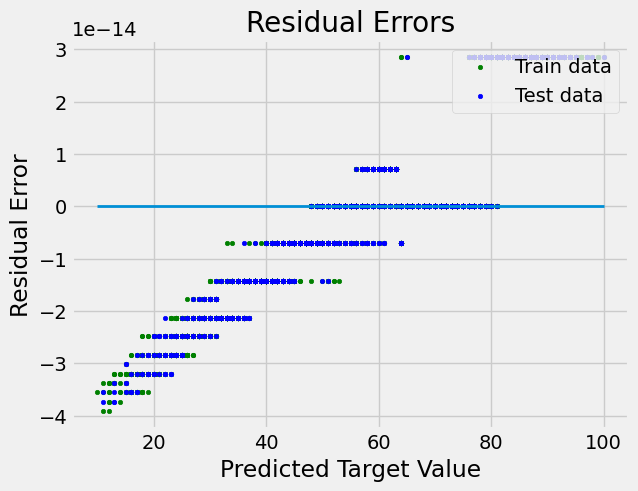

In [39]:

plt.style.use('fivethirtyeight')

# Plotting residuals for training data
plt.scatter(
    multi_regressor.predict(X_train),
    multi_regressor.predict(X_train) - y_train,
    color="green",
    s=10,
    label='Train data'
)

# Plotting residuals for testing data
plt.scatter(
    multi_regressor.predict(X_test),
    multi_regressor.predict(X_test) - y_test,
    color="blue",
    s=10,
    label='Test data'
)

# Horizontal line at y = 0 (residual error baseline)
plt.hlines(y=0, xmin=min(y_train.min(), y_test.min()), xmax=max(y_train.max(), y_test.max()), linewidth=2)

# Adding labels, title, and legend
plt.legend(loc='upper right')
plt.title("Residual Errors")
plt.xlabel("Predicted Target Value")
plt.ylabel("Residual Error")

# Display the plot
plt.show()


In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0626166613292299e-14
MSE: 2.285740250095986e-28
RMSE: 1.511866478924639e-14


# POLYNOMIAL REGRESSION

In [34]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

In [35]:
poly.fit(X_poly, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

In [36]:
y_poly = poly_regressor.predict(poly.fit_transform(X_test))

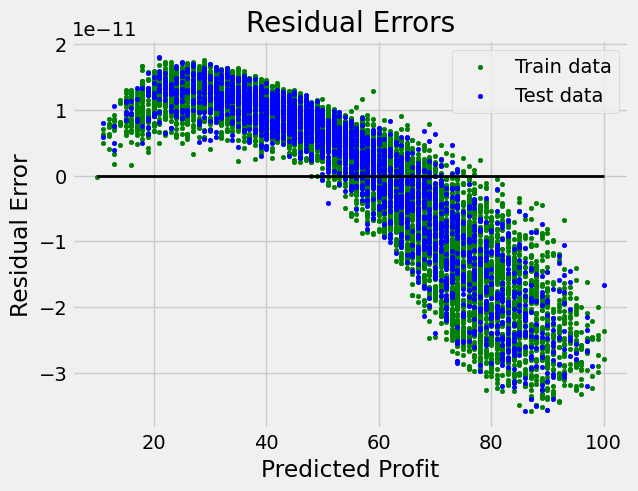

In [40]:


plt.style.use('fivethirtyeight')

# Generate predictions for the training set
y_train_pred = poly_regressor.predict(X_poly)

# Transform the test features into polynomial features
X_test_poly = poly.transform(X_test)

# Generate predictions for the test set
y_test_pred = poly_regressor.predict(X_test_poly)

# Plot residual errors for the training set
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    color="green",
    s=10,
    label="Train data"
)

# Plot residual errors for the test set
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    color="blue",
    s=10,
    label="Test data"
)

# Plot a horizontal line at y = 0 to indicate zero residual error
plt.hlines(
    y=0,
    xmin=min(y_train_pred.min(), y_test_pred.min()),
    xmax=max(y_train_pred.max(), y_test_pred.max()),
    linewidth=2,
    color="black"
)

# Add title, labels, and legend
plt.title("Residual Errors")
plt.xlabel("Predicted Profit")  # Update 'Profit' if needed
plt.ylabel("Residual Error")
plt.legend(loc="upper right")

# Display the plot
plt.show()


In [42]:
# Evaluate the model
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

MAE: 9.769205888687792e-12
MSE: 1.3849121394837997e-22
RMSE: 1.1768229006455473e-11


In [43]:

print('Coefficients:', poly_regressor.coef_)
print('Intercept:', poly_regressor.intercept_)


Coefficients: [-3.38360321e-11 -2.59850452e-12  1.70111470e-12  8.08233863e-13
  5.87313035e-13  1.83616970e-13 -7.13138533e-13  5.00000000e-01
  1.43441948e-12  4.43221848e-16  3.33407781e-13 -2.37976305e-13
  6.23585385e-14  1.95798672e-13  2.50000000e-01 -1.29202985e-12
  2.38587795e-13 -1.89858546e-13  1.00271137e-13  2.02779959e-13
  2.50000000e-01 -2.46014147e-14  4.08791924e-13 -6.89327339e-14
  2.18635873e-14  4.51268797e-14 -2.25937064e-12  1.43473775e-13
 -7.41871842e-14 -4.24994501e-12 -5.25161511e-14 -6.05687375e-14
  4.52762827e-15 -1.67617656e-14 -4.54693574e-13 -5.88723514e-13
  1.36414648e-12 -5.23886490e-16  2.26131613e-13 -1.32782674e-13
  1.25203667e-15  2.93158293e-13  2.50000000e-01 -1.08246745e-14
 -2.78249646e-15 -1.43288159e-15  1.22679644e-14  2.13717932e-15
 -1.52655666e-15 -9.62216418e-14 -4.71234163e-13  4.90926744e-15
 -3.29163780e-15  1.56819002e-15  2.25949814e-12 -1.57970859e-13
  8.20263996e-14  4.26451929e-12  5.42257211e-14  5.90014149e-14
  5.8078542